<a href="https://colab.research.google.com/github/rohandawar/TimeSeries/blob/main/Time_Series_Analysis_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Inital Setup

## Import Standard Packages

In [20]:
# Importing the Libs

# General
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# warnings
import warnings
warnings.filterwarnings('ignore')

## Import Time series Data: Airline Passange Traffic

In [21]:
# read the data

data = pd.read_csv('https://raw.githubusercontent.com/rohandawar/TimeSeries/main/airline-passenger-traffic.csv')
data.columns = ['Month', 'Passangers']
data['Month'] = pd.to_datetime(data['Month'], format='%Y-%m')
data = data.set_index('Month')
data.head()

,Passangers
Month,
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
1949-06-01,135.0


## Time Series Analysis

### Plotting the time series data

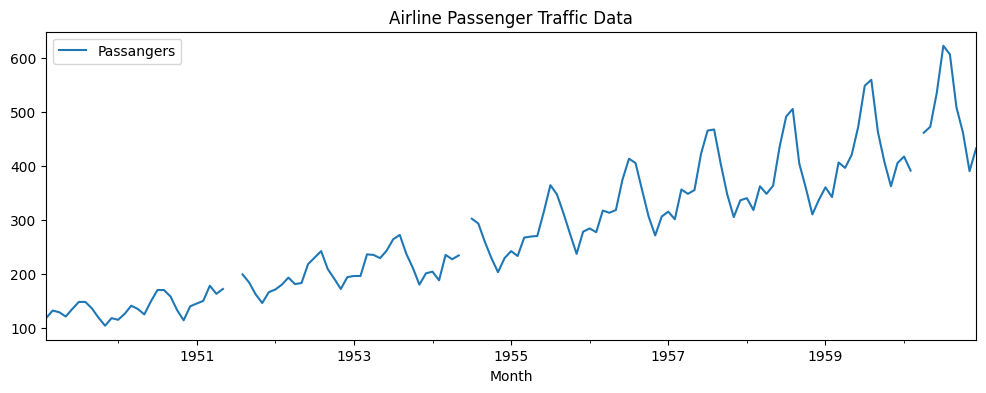

In [22]:
data.plot(figsize=(12,4))
plt.legend(loc='best')
plt.title('Airline Passenger Traffic Data')
plt.show(block=False)

### Missing Value Imputations


#### Mean Imputation

In [23]:
data = data.assign(Passangers_Mean_Imputation = data.Passangers.fillna(data.Passangers.mean()))
data.head()

,Passangers,Passangers_Mean_Imputation
Month,,
1949-02-01,118.0,118.0
1949-03-01,132.0,132.0
1949-04-01,129.0,129.0
1949-05-01,121.0,121.0
1949-06-01,135.0,135.0


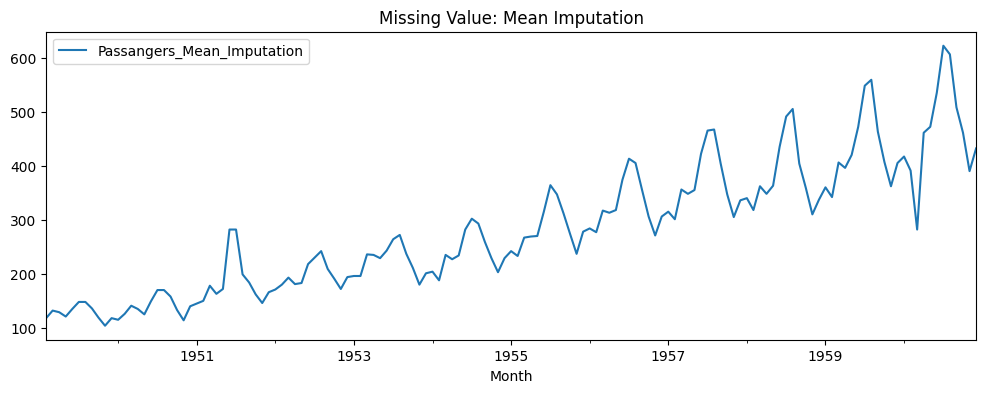

In [24]:
# Plotting post imputation
data[['Passangers_Mean_Imputation']].plot(figsize=(12,4))
plt.legend(loc='best')
plt.title('Missing Value: Mean Imputation')
plt.show(block=False)

#### Linear Interpolation

In [25]:
data = data.assign(Passangers_Linear_Interpolation=data.Passangers.interpolate(method='linear'))
data.head()

,Passangers,Passangers_Mean_Imputation,Passangers_Linear_Interpolation
Month,,,
1949-02-01,118.0,118.0,118.0
1949-03-01,132.0,132.0,132.0
1949-04-01,129.0,129.0,129.0
1949-05-01,121.0,121.0,121.0
1949-06-01,135.0,135.0,135.0


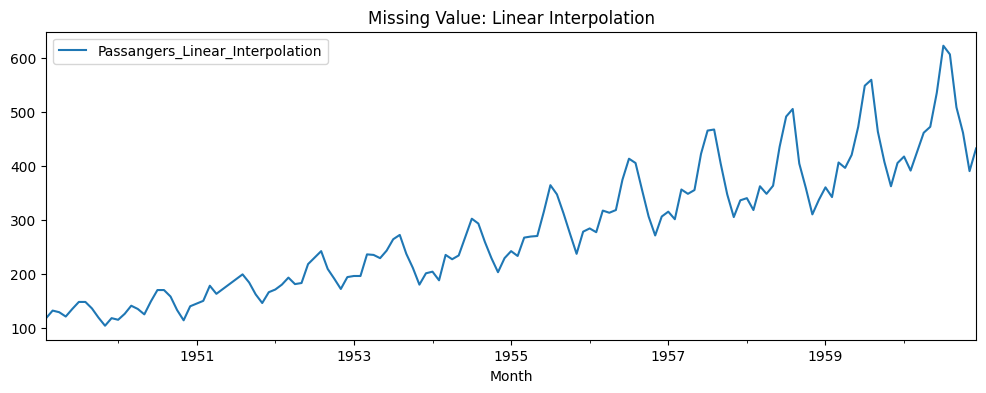

In [26]:
data[['Passangers_Linear_Interpolation']].plot(figsize=(12,4))
plt.legend(loc='best')
plt.title('Missing Value: Linear Interpolation')
plt.show(block=False)

_Using **Liner Interpolation** for imputing the missing Values_

In [28]:
data['Passangers'] = data['Passangers_Linear_Interpolation']
data.drop(['Passangers_Mean_Imputation', 'Passangers_Linear_Interpolation'], axis=1,inplace=True)
data.head()

,Passangers
Month,
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
1949-06-01,135.0


## Outlier Detection

### Box plot & Interquartile range

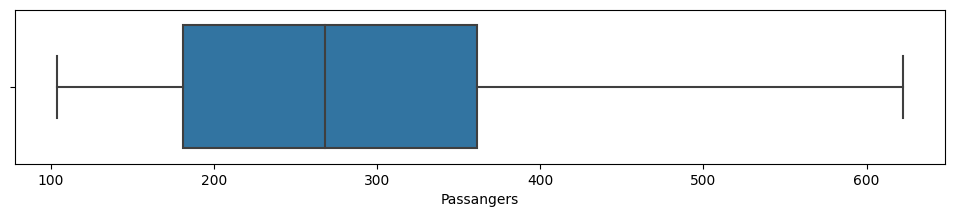

In [29]:
fig = plt.subplots(figsize=(12,2))
ax = sns.boxplot(x=data['Passangers'], whis=1.5)